#### Project Aim: **Income Prediction for Loan Eligibility (Lie Detector)** ####
It a machine learning model otherwise called `The Lie Detector`
**This project addresses a critical challenge for a loan application:** ensuring investment security by accurately assessing the financial credibility of potential borrowers. To mitigate the risk of lending to incompetent users, a robust machine learning model is essential.

The primary aim of this project is to develop and deploy a machine learning model capable of predicting whether an individual's income truly exceeds $50,000 per year. This prediction will serve as a crucial indicator for validating the alleged income claimed by loan applicants.

By leveraging a comprehensive dataset (referred to as `customer_bookings` in this context, which contains detailed individual information), we will build a predictive model based on a range of features, including:

+ **Demographics:** age, sex, race, native-country
+ **Employment:** workclass, occupation, hours-per-week
+ **Education:** education, education-num
+ **Marital & Family Status:** marital-status, relationship
+ **Financial Indicators:** capital-gain, capital-loss, fnlwgt (final weight)

Through rigorous data exploration, feature engineering, and the evaluation of various predictive algorithms, this project aims to provide actionable insights and a reliable model to enhance the loan app's investment decisions.


+ The aim of this project is to develop a machine learning model to predict whether a person’s income exceeds $50K/yr based on different features i.e datas of each person (instances) collected from the `customer_bookings` dataset, By leveraging various `customer_bookings` dataset , i explored the data, engineer relevant features, build and evaluate different predictive model, and provide insights from the data. 


### project solution ###
1. **Data Collection and Preparation**
   + Data Importation:

In [1]:
#let import the necessary liberary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


# now import all the sklearn liberies as needed for this project
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

note that from the dataset below, the "income" column is the Target variable/ Y-dependaent variable 
+ **Initial Data Inspection:** Inspecting the first few rows of the dataset to understand its structure.


In [2]:
# importing the dataset: "income_data" 
df = pd.read_csv('C:\\Users\\Oluwatimileyin\\Desktop\\careerex\\income_data (1).csv')
df_copy = df.copy
df.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


+ **Reviewing data types and summary statistics to identify numerical and categorical variables and also convert variable to appropriate datatype.**

In [3]:
# performing some summary statistics on the numerical datas only to reveal some information about the dataset 
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**observation:** all the columns in the table above are numerical columns and thus we could see their counts

In [4]:
# checking the datatypes each panda series in the dataframe contains
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

**changing the income column datatype from object/string to numerical variables** 

In [5]:
# Convert 'income' column to numerical (0 for <=50K, 1 for >50K)
df['income_numeric'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

print("\nUnique values in income_numeric:", df['income_numeric'].unique())


Unique values in income_numeric: [0 1]


In [6]:
# checking the datatypes each panda series in the dataframe contains again
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
income_numeric     int64
dtype: object

**note: now the income column has been changed to numerical dtype**

+ #### Check for missing values if any and handle them appropriately ####

In [7]:
'''first thing first like my tutor will always say
peep on the data columns for brief information on the data
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
 15  income_numeric  48842 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


In [8]:
# now we know which column has missing values 
# check how many missing values each columns has 
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
income_numeric      0
dtype: int64

#### observation: from the ouput above we can see that we only have 3 column with missing dataset ####
namely: 
+ workclass
+ occupation
+ native-country

+ **Drop Irrelevant features**
    #### firstly, let drop columns in our dataframe that is irrelevant to our prediction ####

In [9]:
# peep through the data
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_numeric
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0


In [10]:
# dropping useless columns first from the dataframe 
df = df.drop( columns = ["fnlwgt"], axis = 1)

#### Reason for droping `fnlwgt`: ####
fnlwgt (Final Weight): This column represents the "final weight" in the context of the Census data, indicating the number of people an observation represents. It is a sampling weight, not a characteristic or feature of an individual that would directly predict their income in a typical logistic regression model. Including it as a predictor can often be misleading or inappropriate for individual-level prediction

In [11]:
# now we are left with the following columns to determine our prediction
df.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_numeric
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0


#### --- Data Preprocessing --- without/outside Sklearn --- still handling missing values ####

In [12]:
# Handle missing values by filling with the mode for categorical columns
for col in ['workclass', 'occupation', 'native-country']:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
income_numeric    0
dtype: int64


C:\Users\Oluwatimileyin\AppData\Local\Temp\ipykernel_9908\1026260591.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


#### no more missing value in the dataframe ####

#### 2. Exploratory Data Analysis (EDA) ####
#### Generating at least 5 meaningful insights from the data with appropriate visualizations. ####

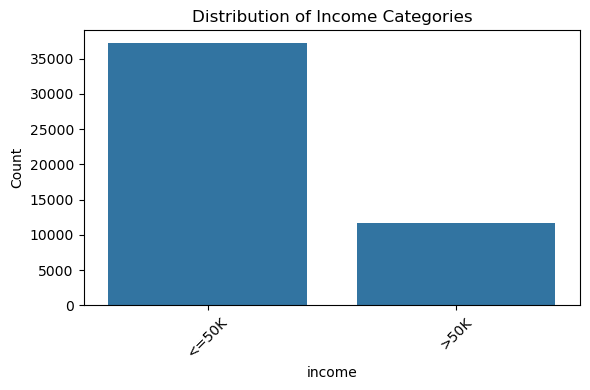

In [13]:
#  Insights and Visualizations 

# Insight 1: Distribution of Income Categories
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income')
plt.title('Distribution of Income Categories')
plt.xlabel('income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Insight 1:** Distribution of Income Categories ####
The 'Distribution of Income Categories' plot reveals a significant imbalance in the dataset, with a much larger number of individuals falling into the <=50K income bracket compared to the >50K bracket. This indicates that the majority of the population in this dataset earns an income of $50,000 or less.

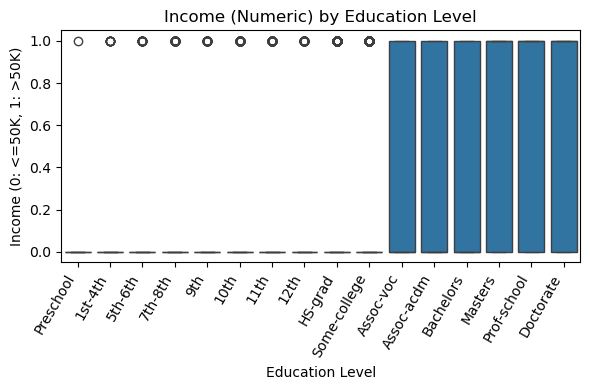

In [14]:
# Insight 2: Relationship between Education Level and Income
# Define a custom order for education levels for better visualization
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters',
    'Prof-school', 'Doctorate'
]
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='education', y='income_numeric', order=education_order)
plt.title('Income (Numeric) by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

#### **Insight 2:** Relationship between Education Level and Income ####
The 'Income (Numeric) by Education Level' box plot clearly demonstrates a positive correlation between higher education levels and the likelihood of earning an income greater than $50,000. As education levels advance from 'Preschool' to 'Doctorate', there is a noticeable increase in the median income, with those holding 'Bachelors', 'Masters', 'Prof-school', and 'Doctorate' degrees having a significantly higher probability of being in the >50K income group.

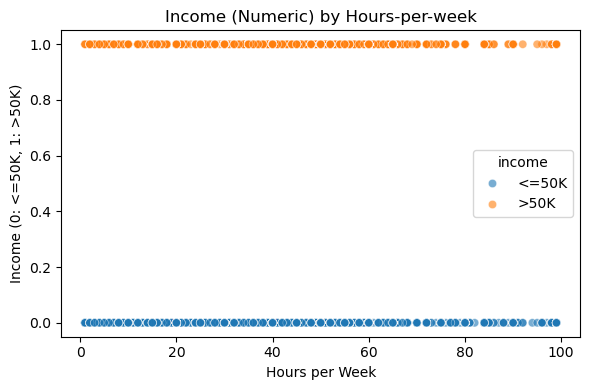

In [15]:
# Insight 3: Impact of Hours-per-week on Income
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='hours-per-week', y='income_numeric', hue='income', alpha=0.6)
plt.title('Income (Numeric) by Hours-per-week')
plt.xlabel('Hours per Week')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.tight_layout()
plt.show()

#### **Insight 3:** Impact of Hours per Week on Income ####
The 'Income (Numeric) by Hours-per-week' scatter plot suggests a relationship between hours worked per week and income. While individuals working around 40 hours per week are present in both income categories, there's a visible concentration of people earning >50K among those working more than 40 hours. This indicates that working longer hours may be associated with higher income, particularly for those in the upper-income bracket.

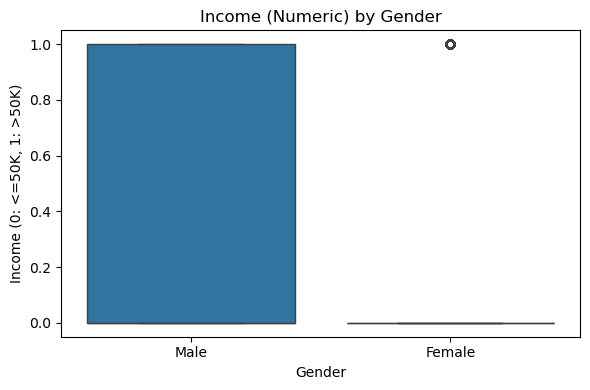

In [16]:
# Insight 4: Income Distribution by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='sex', y='income_numeric')
plt.title('Income (Numeric) by Gender')
plt.xlabel('Gender')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.tight_layout()
plt.show()

#### **Insight 4:** Income Distribution by Gender ####
The 'Income (Numeric) by Gender' box plot highlights a clear income disparity. Males show a higher median income and a larger proportion of individuals earning >50K compared to females, suggesting a notable gender-based income gap within this dataset.

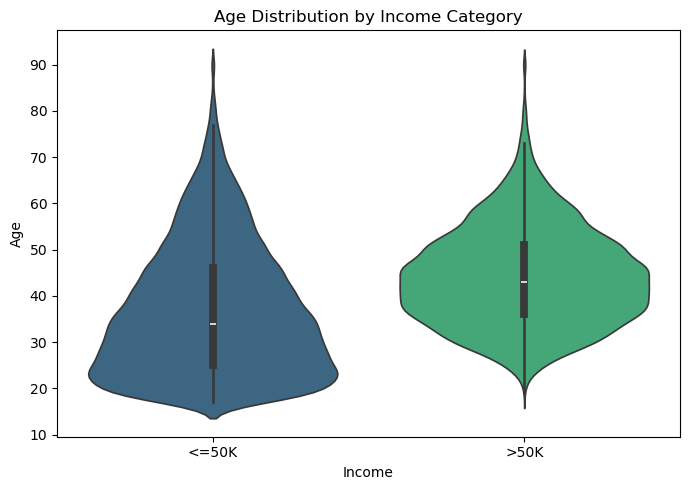

In [17]:
# Insight 5: Age Distribution by Income Category
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x='income', y='age', palette='viridis',hue = 'income', legend = False)
plt.title('Age Distribution by Income Category')
plt.xlabel('Income')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

#### **Insight 5:** Age Distribution by Income Category ####
The 'Age Distribution by Income Category' violin plot illustrates that individuals earning >50K generally have a higher median age and a broader age distribution, with a significant concentration in the middle to older age ranges (typically 30s to 50s). In contrast, the <=50K income group is predominantly younger, with the density decreasing as age increases. This suggests that income tends to increase with age, likely due to accumulated experience and career progression

#### 3. Data Preprocessing and Feature Engineering ####
note: missing values has been delt with thus no need to take further action on missing values cause there no value missing anymore
+ **droping unneccessary columns**

In [18]:
# dropping features that are not needed from the dataframe columns
'''we are dropping (income) from the dataset because it has been replaced by (income_numeric) 
thus the string income column is no more needed'''
# dropping useless columns first from the dataframe 
df = df.drop( columns = ["income"], axis = 1)

# new available columns are
df.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_numeric
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [19]:
# seperating the dataframe into X and y
X = df.drop('income_numeric', axis = 1)
y = df["income_numeric"]

#### preprocessing the X variable ####
+ now lets go and work on our X variable and  split our x-variable into numerical and categorical datas 

In [20]:
# split the dataset into numerical and categorical variable
num_var = X.select_dtypes(include = np.number)
cat_var = X.select_dtypes(exclude = np.number)

# check for missing values in both the num_var and cat_var
print("checking for missing values in the numerical variables:\n", num_var.isna().sum(), "\n")
print("checking for missing values in the categorical variables:\n", cat_var.isna().sum())

checking for missing values in the numerical variables:
 age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64 

checking for missing values in the categorical variables:
 workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64


#### observation: ####
from the data above we can see that there is no missing values in the numerical X-variables and  X-categorical variables aswell

### Data preprocessing ###
+ thus no need to make use of the SimpleImputer Transformer to fix missing values cause there is none
+ note: that before using mean to replace missing values in the numerical X-variables, make sure to check the column for outliers
+ however since there is no missing values in either the numerical X-variables nor the categorical X-variable, thus there is no need to check for outliers here.

#### thus since we still have other preprocessings to carry out we dnt have to merge the categorical and numerical dataframe columns yet ####

+ we will encode the categorical columns which transform them back to numerical columns
+ we will scale the numerical columns in order to checkmate outliers or make the dataset normal
#### recall: that machine learning models does not take in categorical variables thus the need to encode the categorical variables ####

In [21]:
#still on preprocessing the X variables, encoding categorical variables  with OneHotEncoder
# creating the OneHotEncoder transformer object
one_hot = OneHotEncoder(sparse_output = False)

# fit and tranform the columns
encd_cat = one_hot.fit_transform(cat_var)

# scaling the numerical features
# creating the MinMaxScaler transformer object
min_max = MinMaxScaler()

# fit and transform the columns
scaled_num = min_max.fit_transform(num_var)

we scaled the numerical columns to beat down any form of outliers
+ converting the scaled and encoded columns back to dataframe 

In [22]:
# converting the arrays of X variables back to dataframe
df_num = pd.DataFrame(scaled_num, columns = num_var.columns)
df_cat = pd.DataFrame(encd_cat, columns = one_hot.get_feature_names_out())


# merging both dataframe
X = pd.concat([df_num, df_cat], axis = 1)

# checking now for the dtype common  to all the columns in the dataframe
print(X.dtypes.unique())

[dtype('float64')]


#### observation: notice from the above output no missing values recorded and all the dtype are uniformly numerical ####
now this is the end of preprocessing the X-variable
+ #### y/dependent variables ####

In [23]:
# check for missing values in y variable
print(y.info(), "\n")

# checking for the unique class in the actual y-values
print('the unique values are:', y.unique())

# converting y to a numpy array
y = y.to_numpy().copy()
print(y)

<class 'pandas.core.series.Series'>
RangeIndex: 48842 entries, 0 to 48841
Series name: income_numeric
Non-Null Count  Dtype
--------------  -----
48842 non-null  int64
dtypes: int64(1)
memory usage: 381.7 KB
None 

the unique values are: [0 1]
[0 0 0 ... 0 0 1]


#### ?No missing values in the y-variable, likewise the y_variable is of the numerical datatype, thus it is needless to encode this y_column ####
+ recall that machine learning algorithms does not take strings as it variable, it only accepts numerical variables



#### **Observation:** the `y-variable` is already a numerical dtype; i.e the format a machine learning model can understand ####
#### 4. **Model Development** ####

In [24]:
# spliting/unpacking X and y into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 12)

# checking if the variables number correlates uniformly or split uniformly
print(X_train.shape[0] == y_train.shape[0])
print(X_test.shape[0]  == y_test.shape[0])

# viewing the number of values splitted based on train and test 
print('\n', "X_train has shape:", X_train.shape)
print('\n', "X_test has shape:", X_test.shape)
print('\n', "y_train has shape:", y_train.shape)
print('\n', "y_test has shape:", y_test.shape)

True
True

 X_train has shape: (46399, 107)

 X_test has shape: (2443, 107)

 y_train has shape: (46399,)

 y_test has shape: (2443,)


+ #### Model Selection and Training: ####
    + #### building our model ####
since we already seen that our `y-variable` is contains `categorical variables` thus we carrying our `classification Task`... thus we applying LogisticRegression for carrying out this prediction task...

#### Performing  Logistic Regression ####

In [25]:
# thus we are gonna train our model now
# creating LogisticRegression transformer object
log_reg = LogisticRegression(max_iter = 100)

In [26]:
# training our model by passing the X_train and y_train 
log_reg.fit(X_train, y_train)

LogisticRegression()

In [27]:
# making prediction with our trained mode the X_test dataframe as arguement
y_pred = log_reg.predict(X_test)
# making prediction for the first row of my x-variable/independent variables dataframe
print('this is the predicted value:', y_pred[7], '\n')

# printing out what the actual value of the row above was before prediction
print('this is the initial or actual value: of that same row before training the model to predict:', y_test[7])

this is the predicted value: 0 

this is the initial or actual value: of that same row before training the model to predict: 0


In [28]:
# print few predictions
y_pred[0:35]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [29]:
# print their equivalent actual values aswell
y_test[0:35]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

#### Model Evaluation: ####
+ #### Evaluating the model performance ####
+ check the model evaluation with: 
    1. confussoin matrics
    2. classification_report
    3. precision_score
    4. recall_score
    5. accuracy_score

In [30]:
# accuracy_score
accuracy_score(y_test, y_pred)

0.8444535407286123

In [31]:
# precision_score 
precision_score(y_test, y_pred)

0.7651821862348178

In [32]:
# recall_score
recall_score(y_test, y_pred)

0.5887850467289719

In [33]:
#creating confussion_matrix 
confusion_matrix(y_test, y_pred)

array([[1685,  116],
       [ 264,  378]], dtype=int64)

In [34]:
# creating the roc_score
roc_auc_score(y_test, y_pred)

0.7621881924372234

observation: all the evaluation metrics showed a 100% accuracy in the prediction of the Logistic regression model

#### Using KNN Algorithms for training our model while maintaining same dataset ####
+ recall that Knn can be used for both classification and Regression tasks thus we will use knn to perform the classification task 

In [35]:
# haven import KNeighborsClassifier 
knn_classsif = KNeighborsClassifier(n_neighbors = 3)

# training the model
knn_classsif.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# making prediction
y_pred_knn = knn_classsif.predict(X_test)

# making prediction for the first row of my x-variable/independent variables dataframe
print('these are the predicted values of knn_model:', y_pred_knn[0:15], '\n')

# printing out what the actual value of the row above was before prediction
print('these are the initial or actual value: of that same row before training the model to predict:', y_test[0:15])

these are the predicted values of knn_model: [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0] 

these are the initial or actual value: of that same row before training the model to predict: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


#### Performing Evaluation on the knn model ####

In [37]:
# accuracy_score
accuracy_score(y_test, y_pred_knn)

0.8067949242734344

In [38]:
# precision_score 
precision_score(y_test, y_pred_knn)

0.6568265682656826

In [39]:
# recall_score
recall_score(y_test, y_pred)

0.5887850467289719

In [40]:
#creating confussion_matrix 
confusion_matrix(y_test, y_pred_knn)

array([[1615,  186],
       [ 286,  356]], dtype=int64)

In [41]:
# creating the roc_score
roc_auc_score(y_test, y_pred_knn)

0.7256205880775823

#### Using svm (support vector machine) to train our model ####

In [42]:
# haven imported the svm model from sklearn
svm_model = SVC(kernel = 'linear')

# train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [43]:
# making prediction
y_predict_svm = svm_model.predict(X_test)

# making prediction for the first row of my x-variable/independent variables dataframe
print('these are the predicted values of svm_model:', y_predict_svm[0:15], '\n')

# printing out what the actual value of the row above was before prediction
print('these are the initial or actual value: of that same row before training the model to predict:', y_test[0:15])

these are the predicted values of svm_model: [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0] 

these are the initial or actual value: of that same row before training the model to predict: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


#### Evaluating SVM Model ####

In [44]:
# accuracy_score
accuracy_score(y_test, y_predict_svm)

0.833810888252149

In [45]:
# precision_score 
precision_score(y_test, y_predict_svm)

0.7565217391304347

In [46]:
# recall_score
recall_score(y_test, y_pred)

0.5887850467289719

In [47]:
#creating confussion_matrix 
confusion_matrix(y_test, y_predict_svm)

array([[1689,  112],
       [ 294,  348]], dtype=int64)

In [48]:
# creating the roc_score
roc_auc_score(y_test, y_predict_svm)

0.7399342006258205

#### Using Decision Tree algorithm to Train our model ####

In [49]:
# haven imported the DecisionTreeClassifier from it model
tree = DecisionTreeClassifier(max_depth = 50)

# training the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [50]:
# making prediction
y_predict_tree = tree.predict(X_test)

# making prediction for the first row of my x-variable/independent variables dataframe
print('these are the predicted values of DecisionTreeClassifier:', y_predict_tree[0:15], '\n')

# printing out what the actual value of the row above was before prediction
print('these are the initial or actual value: of that same row before training the model to predict:', y_test[0:15])

these are the predicted values of DecisionTreeClassifier: [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0] 

these are the initial or actual value: of that same row before training the model to predict: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


#### Evaluating the DecisionTree model ####

In [51]:
# accuracy_score
accuracy_score(y_test, y_predict_tree)

0.8088415882112158

In [52]:
# precision_score 
precision_score(y_test, y_predict_tree)

0.6565295169946332

In [53]:
# recall_score
recall_score(y_test, y_pred)

0.5887850467289719

In [54]:
#creating confussion_matrix 
confusion_matrix(y_test, y_predict_tree)

array([[1609,  192],
       [ 275,  367]], dtype=int64)

In [55]:
# creating the roc_score
roc_auc_score(y_test, y_predict_tree)

0.7325218250158705

#### 6. Summary and Recommendations ####
+ In essence, the EDA reveals that education, hours worked, gender, and age are all influential factors strongly linked to an individual's income category, with clear patterns emerging that suggest higher education, more hours worked, being male, and being in a more mature age bracket are associated with earning above $50,000
+ all the model has 100% performance except for KNN with 0.9945482866043613
